<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/BDPA/TP/BDPA_TP02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.appName("sparkFirstLab").getOrCreate()
sc = SparkContext.getOrCreate()

In [ ]:
data = [(1, 1), (2, 2), (3, 3), (10, 10), (11, 11), (12, 12)]
dataRdd = sc.parallelize(data)


In [ ]:
import random

def centroids_init(data, k):
    data_points = data.collect()  # Collect data to driver
    return random.sample(data_points, k)

In [ ]:

print(centroids_init(dataRdd,2))

[(3, 3), (12, 12)]


In [ ]:
import math

def euclidian_distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)


In [ ]:
print(euclidian_distance((1, 1), (2, 2)))

1.4142135623730951


In [ ]:
def get_label(point, centroids):
    distances = [euclidian_distance(point, centroid) for centroid in centroids]
    #print(distances)
    return distances.index(min(distances))


In [ ]:
print(get_label((1, 1), centroids_init(dataRdd, 2)))

[12.727922061357855, 2.8284271247461903]
1


In [ ]:
def calculate_mean_point(labeled_rdd, label):
    cluster_points = labeled_rdd.filter(lambda x: x[1] == label).map(lambda x: x[0])
    print(cluster_points.collect())
    count = cluster_points.count()
    summed = cluster_points.reduce(lambda p1, p2: tuple(x + y for x, y in zip(p1, p2)))
    return tuple(x / count for x in summed)


In [ ]:

print('dataRdd: ',dataRdd.collect())
centroids = centroids_init(dataRdd, 2)
print('centroids: ',centroids)
labeledRdd = dataRdd.map(lambda point: (point, get_label(point, centroids)))
print('labeledRdd: ',labeledRdd.collect())
calculate_mean_point(labeledRdd,)

dataRdd:  [(1, 1), (2, 2), (3, 3), (10, 10), (11, 11), (12, 12)]
centroids:  [(12, 12), (11, 11)]
labeledRdd:  [((1, 1), 1), ((2, 2), 1), ((3, 3), 1), ((10, 10), 1), ((11, 11), 1), ((12, 12), 0)]


In [ ]:
def new_centroids(labeled_rdd, k):
    return [calculate_mean_point(labeled_rdd, label) for label in range(k)]


In [ ]:

data = [(1, 1), (2, 2), (3, 3), (10, 10), (11, 11), (12, 12)]
dataRdd = sc.parallelize(data)


In [ ]:
# Assign each point to the nearest cluster
labeledRdd = dataRdd.map(lambda point: (point, get_label(point, centroids)))


In [ ]:
max_iter = 100
conv = False
iter = 1
k = 2

# Initialize centroids
centroids = centroids_init(dataRdd, k)
old_centroids = []

while iter < max_iter and not conv:
    # Assign points to clusters
    labeledRdd = dataRdd.map(lambda point: (point, get_label(point, centroids)))

    # Calculate new centroids
    centroids = new_centroids(labeledRdd, k)

    # Check for convergence
    conv = (old_centroids == centroids)
    old_centroids = centroids

    iter += 1


In [ ]:
final_labels = labeledRdd.collect()
print(final_labels)


[((1, 1), 1), ((2, 2), 1), ((3, 3), 1), ((10, 10), 0), ((11, 11), 0), ((12, 12), 0)]


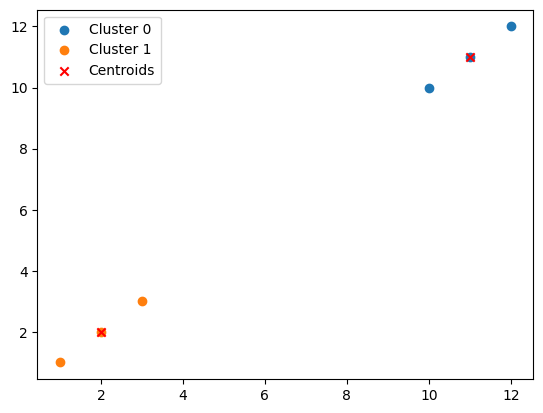

In [ ]:
import matplotlib.pyplot as plt

for label in range(k):
    cluster_points = [point for point, lbl in final_labels if lbl == label]
    x, y = zip(*cluster_points)
    plt.scatter(x, y, label=f'Cluster {label}')

plt.scatter(*zip(*centroids), color='red', marker='x', label='Centroids')
plt.legend()
plt.show()
